## Import the necessary files

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Fetch the path for the images

In [2]:
data = []
labels = []
classes = 43
dataset_dir = r'C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition'
#Retrieving the images and their labels 
metaDf = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition\Meta.csv') 
trainDf = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition\Train.csv') 
testDf= pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition\Test.csv') 
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']
print('SHAPE of training set:',trainDf.shape)
print('SHAPE of test set:',trainDf.shape)
print('SHAPE of MetaInfo:',trainDf.shape)


SHAPE of training set: (39209, 8)
SHAPE of test set: (39209, 8)
SHAPE of MetaInfo: (39209, 8)


## Load the path

In [3]:
trainDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), trainDf['Path']))
testDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), testDf['Path']))
metaDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), metaDf['Path']))

## Print the samples from the files to verify its correctness

In [4]:
trainDf.sample(10)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
4031,30,32,5,6,25,27,2,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
29629,53,49,6,6,48,43,25,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
33781,27,31,5,5,22,26,34,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
12053,44,44,6,5,39,39,7,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
38579,26,26,6,5,21,20,40,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
33044,35,35,5,5,30,30,32,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
2418,44,47,6,6,39,42,1,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
22088,76,74,6,7,70,68,13,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
15561,45,45,6,6,40,40,10,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...
21941,40,35,6,6,35,30,13,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...


In [5]:
metaDf.sample(10)


,Path,ClassId,ShapeId,ColorId,SignId
42,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,9,1,0,3.25
7,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,14,3,0,2.2
31,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,37,1,1,4.5
15,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,21,0,0,1.3.2
27,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,33,1,1,4.2
2,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,1,1,0,3.29
9,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,16,1,0,3.3
33,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,39,1,1,4.8
14,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,20,0,0,1.1
13,C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Re...,2,1,0,3.29


## Analyze the class distribution using Histogram

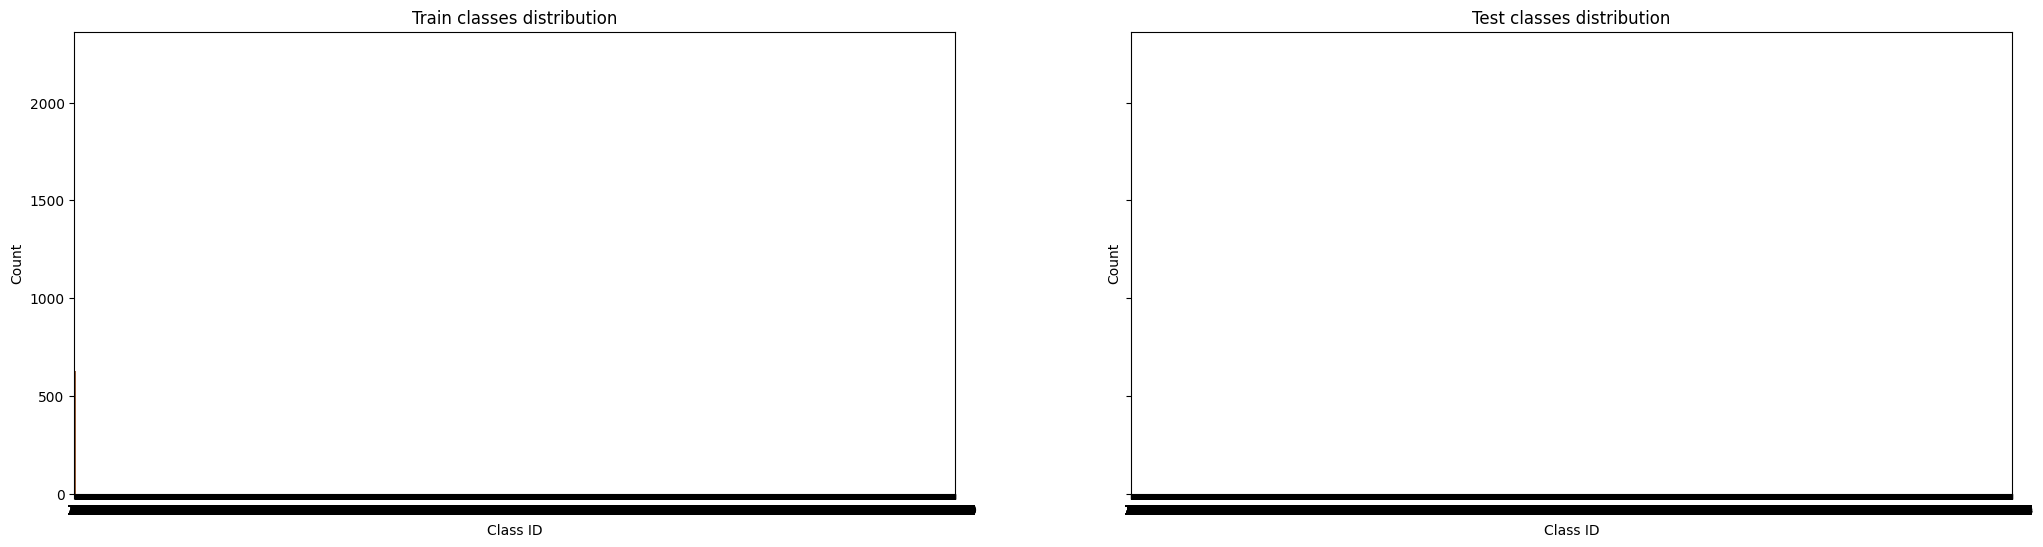

In [6]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6))
axs[0].set_title('Train classes distribution')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[1].set_title('Test classes distribution')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
#sns.countplot(trainDf.ClassId, ax=axs[0],palette = "Set1")
sns.countplot(x='ClassId', hue='ClassId', ax=axs[0], palette="Set1", legend=False, data=trainDf)

sns.countplot(testDf.ClassId, ax=axs[1])
axs[0].set_xlabel('Class ID');
axs[1].set_xlabel('Class ID');


## Analyze the size distribution of images

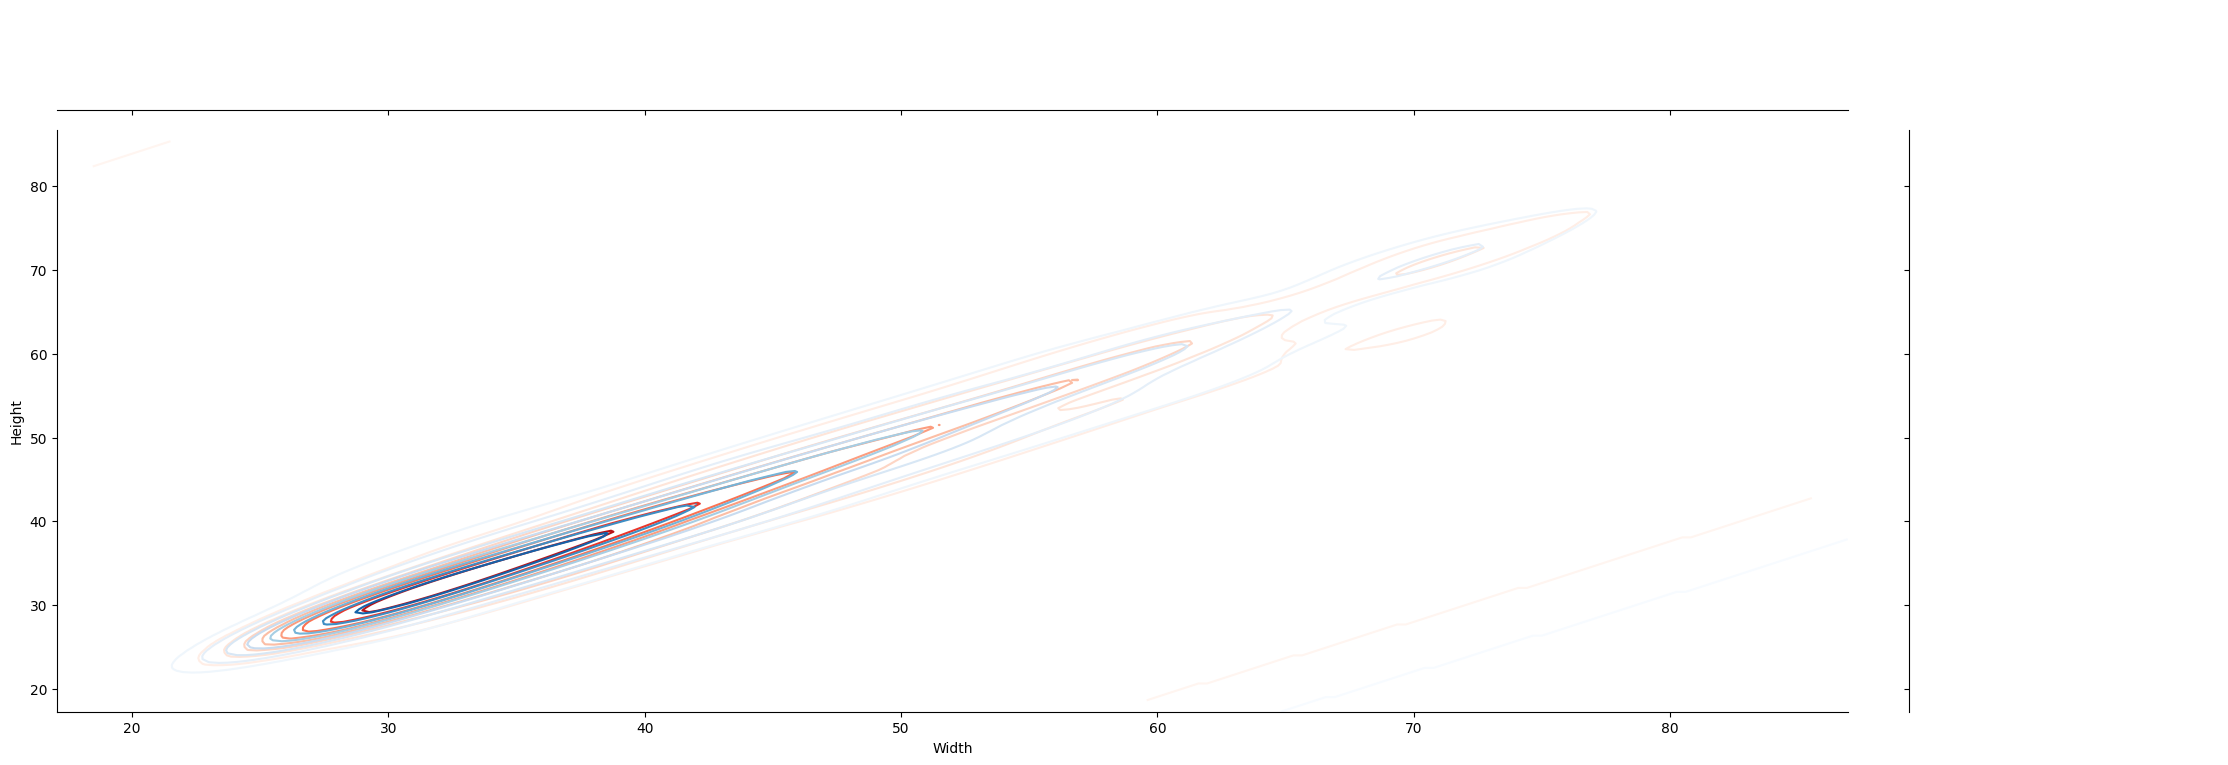

In [11]:
# Subset the data
trainDfDpiSubset = trainDf[(trainDf.Width < 80) & (trainDf.Height < 80)]
testDfDpiSubset = testDf[(testDf.Width < 80) & (testDf.Height < 80)]

# Create a JointGrid
g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)

# Plot the KDE plots with `fill` instead of `shade`
sns.kdeplot(x="Width", y="Height", data=trainDfDpiSubset, cmap="Reds", fill=False, thresh=0, ax=g.ax_joint)
sns.kdeplot(x="Width", y="Height", data=testDfDpiSubset, cmap="Blues", fill=False, thresh=0, ax=g.ax_joint)

# Set the figure size
g.fig.set_figwidth(25)
g.fig.set_figheight(8)

# Display the plot
plt.show()



## Visualize the target class

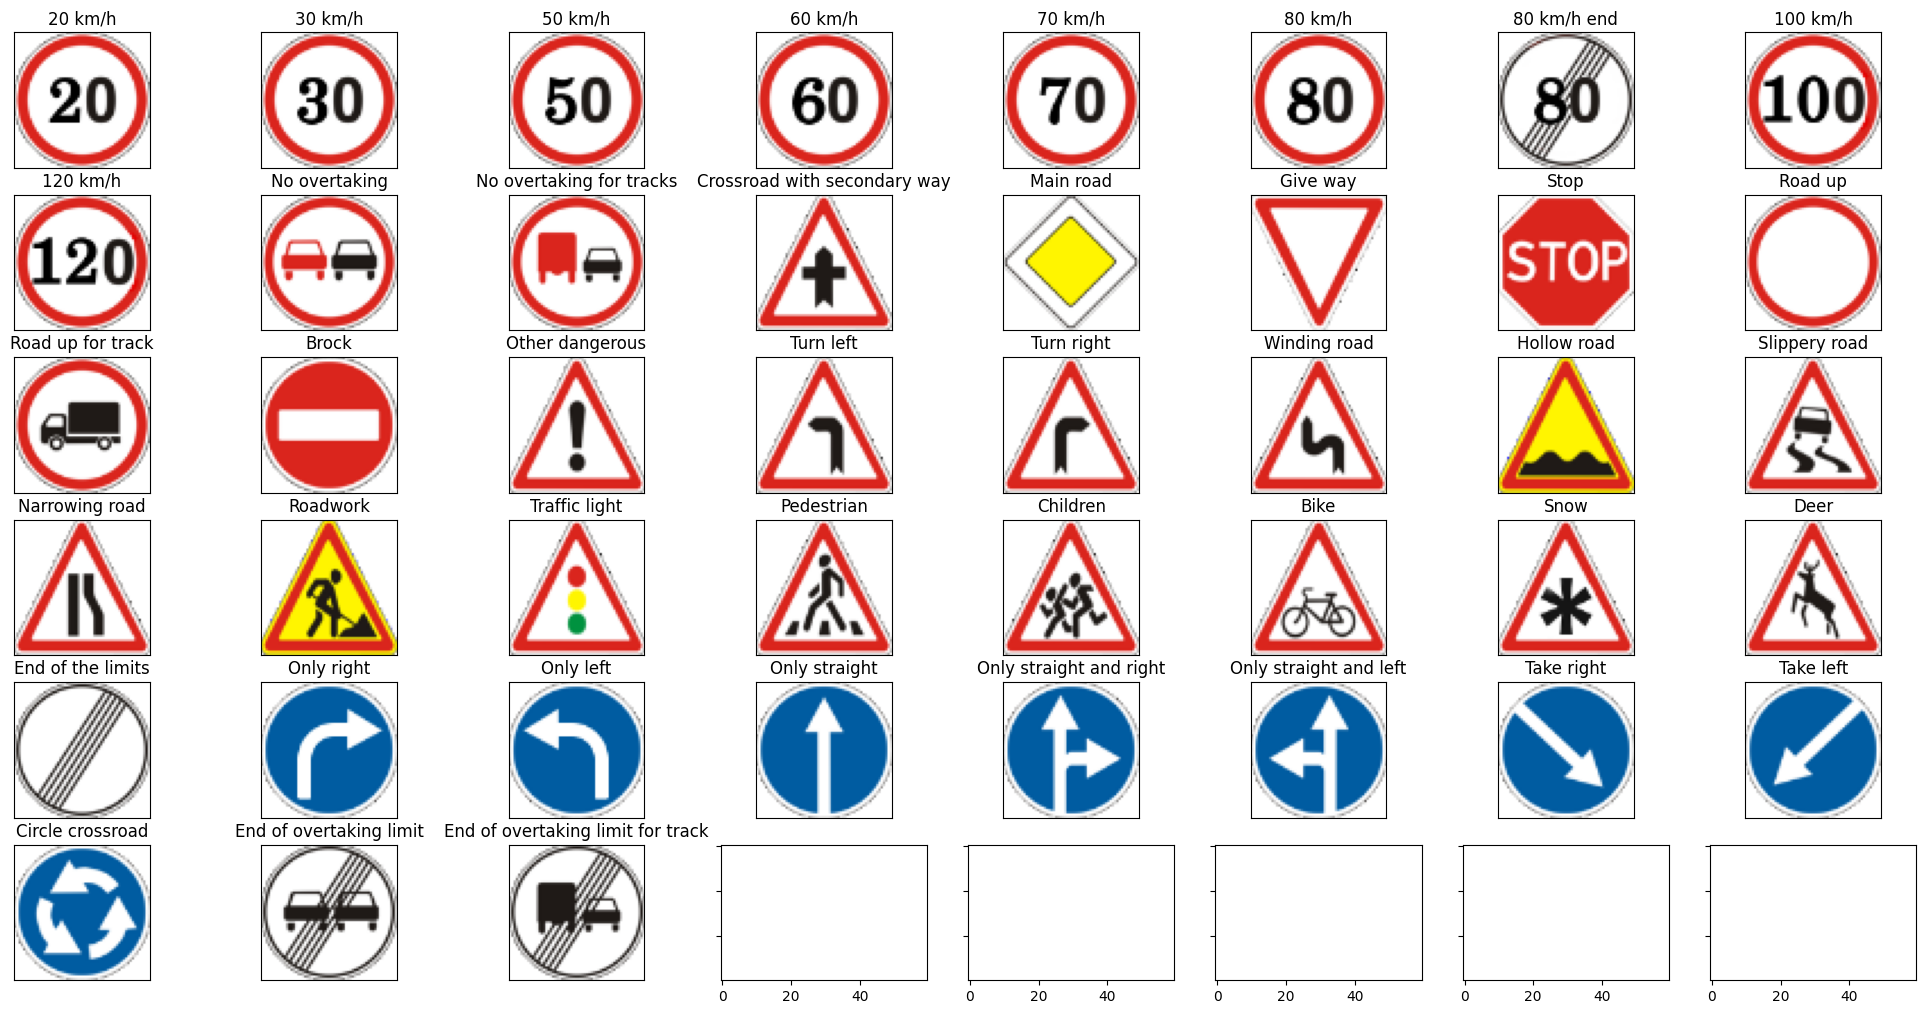

In [13]:
sns.set_style()
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
metaDf = metaDf.sort_values(by=['ClassId'])
idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metaDf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED)
        img[np.where(img[:,:,3]==0)] = [255,255,255,255]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        
        axs[i,j].imshow(img)
        axs[i,j].set_facecolor('xkcd:salmon')
        axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(labels[int(metaDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1


## Visualize the Training set

C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition


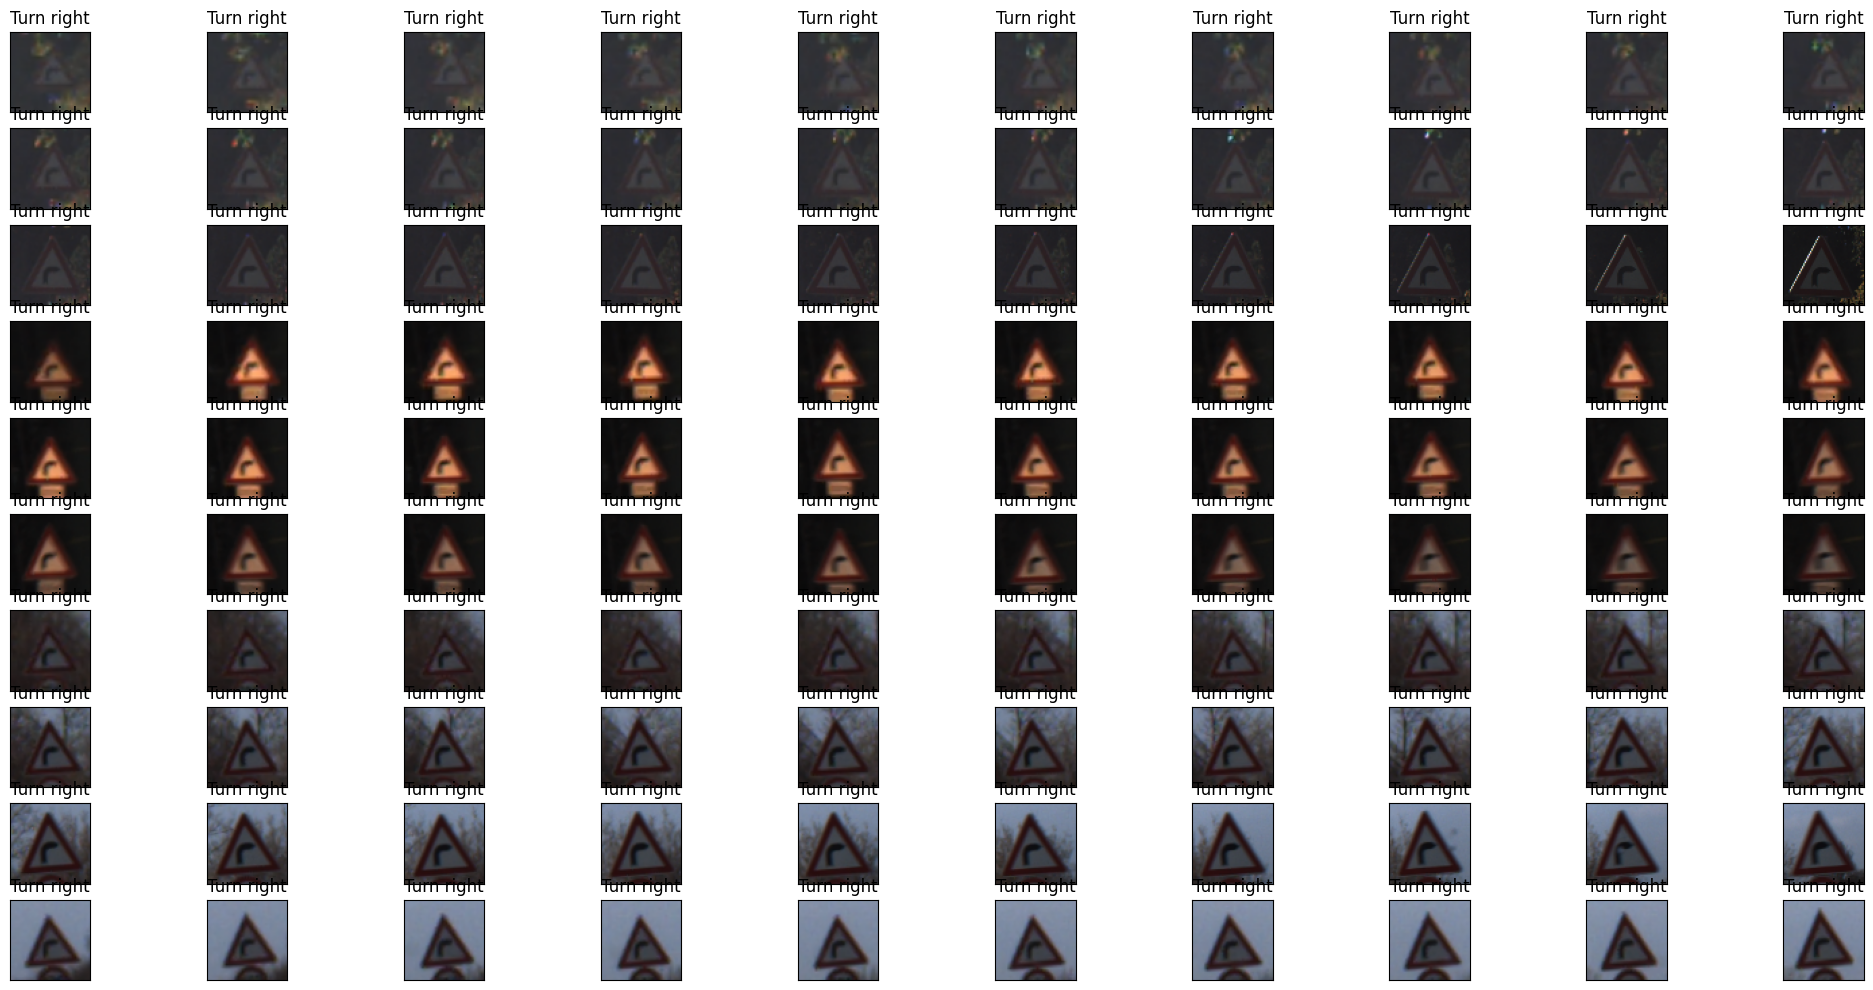

In [16]:
rows = 10
cols = 10
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
cur_path = r'C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition'
print(cur_path)
idx = 0
for i in range(rows):
    for j in range(cols):
        path = os.path.join(cur_path,trainDf["Path"].tolist()[idx]) 
        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        #print(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[int(trainDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1


## Model building using Convolutional Neural Network

In [26]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    print(path)
    print(images)
    #Converting lists into numpy arrays
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")




C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition
C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition\Train\0
['00000_00000_00000.png', '00000_00000_00001.png', '00000_00000_00002.png', '00000_00000_00003.png', '00000_00000_00004.png', '00000_00000_00005.png', '00000_00000_00006.png', '00000_00000_00007.png', '00000_00000_00008.png', '00000_00000_00009.png', '00000_00000_00010.png', '00000_00000_00011.png', '00000_00000_00012.png', '00000_00000_00013.png', '00000_00000_00014.png', '00000_00000_00015.png', '00000_00000_00016.png', '00000_00000_00017.png', '00000_00000_00018.png', '00000_00000_00019.png', '00000_00000_00020.png', '00000_00000_00021.png', '00000_00000_00022.png', '00000_00000_00023.png', '00000_00000_00024.png', '00000_00000_00025.png', '00000_00000_00026.png', '00000_00000_00027.png', '00000_00000_00028.png', '00000_00000_00029.png', '00000_00001_00000.png', '00000_00001_00001.png', '00000_00001_00002.png', '00000_00001_00003.png', '00000_00001_00004.png', '000

## Read the images and convert to numpy arrays

In [28]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


## Split the training set

In [29]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert the label using one hot encoding 

In [30]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


## Build the CNN model

In [36]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


## Compile the model

In [38]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 95s 93ms/step - accuracy: 0.3769 - loss: 2.7424 - val_accuracy: 0.8826 - val_loss: 0.4458
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 96s 98ms/step - accuracy: 0.7852 - loss: 0.7322 - val_accuracy: 0.9464 - val_loss: 0.2071
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 90ms/step - accuracy: 0.8604 - loss: 0.4649 - val_accuracy: 0.9607 - val_loss: 0.1415
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 118s 120ms/step - accuracy: 0.8865 - loss: 0.3878 - val_accuracy: 0.9718 - val_loss: 0.1124
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 94ms/step - accuracy: 0.9033 - loss: 0.3250 - val_accuracy: 0.9735 - val_loss: 0.0950
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 164s 116ms/step - accuracy: 0.9237 - loss: 0.2647 - val_accuracy: 0.9791 - val_loss: 0.0702
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 117s 119ms/step - accuracy: 0.9283 - loss: 0.2537 - val_accuracy: 0.9758 - val_loss: 0.0768
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 122s 125ms/step - accuracy: 0.9315 - loss: 0

## Plot the accuracy and loss

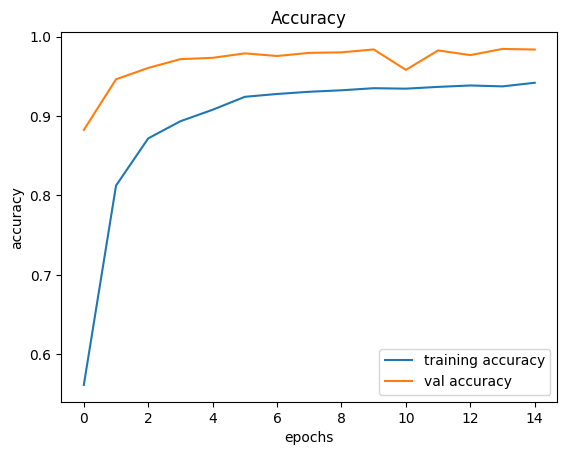

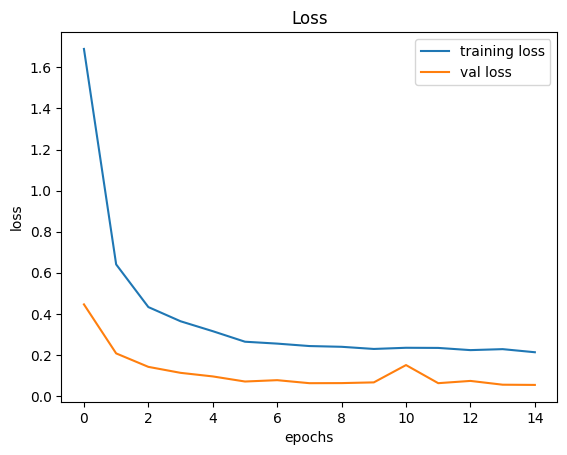

In [39]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


## Load the test data along with labels

In [41]:
#testing accuracy on test dataset
cur_path = os.getcwd()
print(cur_path)
#Retrieving the images and their labels 
#for i in range(classes):
path = os.path.join(cur_path,'Test')
images = os.listdir(path)
print(path)
print(images)


C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition
C:\Users\HP\OneDrive\Desktop\Traffic_Signal_Recognition\Test
['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png'

## Predict the class

In [46]:
X_test=np.array(data)
pred_prob = model.predict(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
pred = np.argmax(pred_prob, axis=1)
print(accuracy_score(labels, pred))



1226/1226 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step
0.9891096431941646
